In [1]:
from faker import Faker
import numpy as np
import pandas as pd
import random as rd
from lib import analyze, util
from scipy.stats import truncnorm

In [2]:
n = 10000 # data-points
datafield = "VPN Usage"
fake = Faker('en_IN') # Faker instance
Faker.seed(42)
np.random.seed(42)
rd.seed(42)

In [3]:
vpn_stat = (8, 4)

In [4]:
df = util.fabricate_base_data()
df[datafield] = util.create_positive_norm_distribution(vpn_stat, 2, 0.05)

In [5]:
df.head(100)

,Name,Age,E-mail,Phone No.,VPN Usage
Aadhar No.,,,,,
223005401501,Aryan Maharaj,34.0,udantdewan@example.net,+918196001338,4.78
911856239313,Rushil Saini,56.0,saumyamall@example.org,+916542351161,10.34
367469214295,Hemangini Lalla,44.0,sharafjeet@example.com,+918495931034,14.85
251282538206,Viraj Chaudhuri,40.0,dmall@example.net,02553419283,7.49
214832269481,Turvi Raghavan,26.0,theodore50@example.org,+915641395376,4.10
...,...,...,...,...,...
894035742189,Qabil Deshmukh,37.0,shankarbalhaar@example.com,+910305486874,NaN
939668623711,Rayaan Mangal,38.0,champak54@example.org,06676527758,5.09
654818085172,Fitan Samra,35.0,sanipranit@example.net,05115447962,3.12


Analyzing DataFrame...
Shape: (10000, 5)
Data types: 
Name          object
Age          float64
E-mail        object
Phone No.     object
VPN Usage    float64
dtype: object
Columns: 
['Name', 'Age', 'E-mail', 'Phone No.', 'VPN Usage']
Number of unique values: 
Name          9832
Age             48
E-mail        9911
Phone No.    10000
VPN Usage     1700
dtype: int64
First 5 rows: 
                         Name   Age                  E-mail      Phone No.  \
Aadhar No.                                                                   
223005401501    Aryan Maharaj  34.0  udantdewan@example.net  +918196001338   
911856239313     Rushil Saini  56.0  saumyamall@example.org  +916542351161   
367469214295  Hemangini Lalla  44.0  sharafjeet@example.com  +918495931034   
251282538206  Viraj Chaudhuri  40.0       dmall@example.net    02553419283   
214832269481   Turvi Raghavan  26.0  theodore50@example.org  +915641395376   

              VPN Usage  
Aadhar No.               
223005401501     

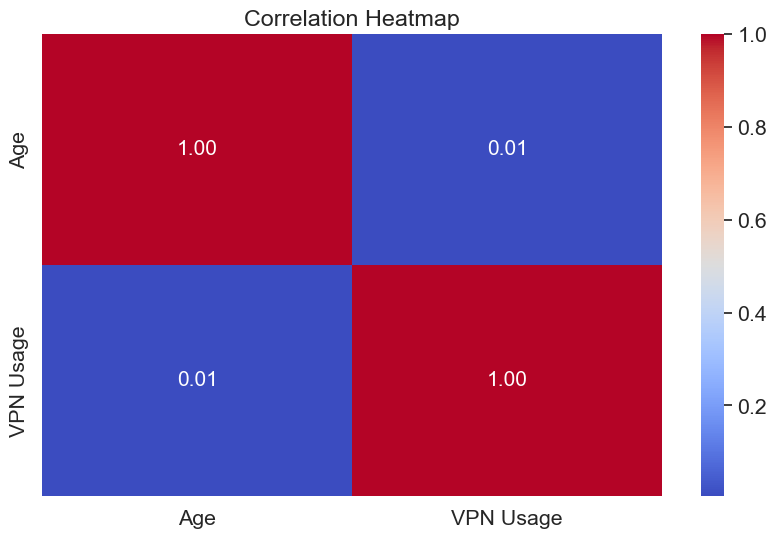

Pairplot of numerical features:


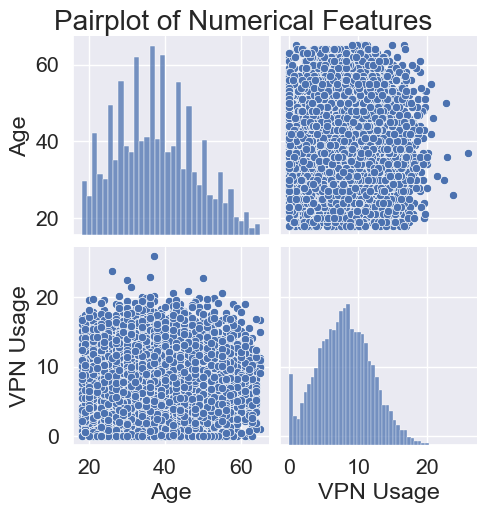

Value Counts for Categorical Features:
Bar plots by `Aadhar No.`:


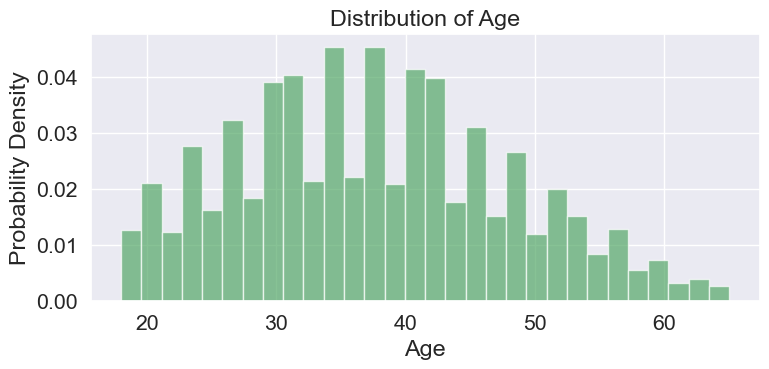

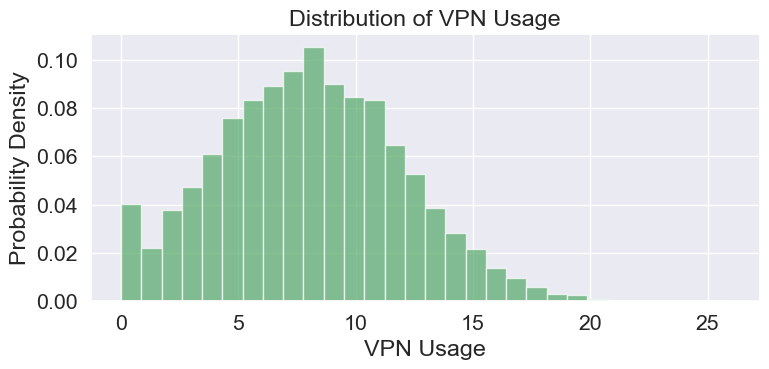

In [6]:
analyze.analyze_dataframe(df)

In [7]:
df.to_csv(f'data/Fabricated Data - {datafield}.csv', index = False)

In [8]:
# Step 1: Base identity data
df = util.fabricate_base_data()

# Step 2: Define stats for the 3 correlated features
# Format: (mean, std, min, max)
stats_list = [
    (4, 1.5, 0, 10),    # VPN usage in hours
    (1, 0.5, 0, 1),     # Antivirus subscription (0=no, 1=yes)
    (2, 1, 0, 5)        # SIM changes per year
]

# Step 3: Define correlation matrix
correlation_matrix = [
    [1.0, 0.4, 0.5],  # VPN with others
    [0.4, 1.0, 0.3],  # Antivirus with others
    [0.5, 0.3, 1.0]   # SIM changes with others
]

# Step 4: Generate correlated data
correlated_features = util.create_normal_distribution_with_correlation(
    stats_list=stats_list,
    correlation_matrix=correlation_matrix,
    n=len(df),
    precision=2,
    nan_probability=0.05
)

# Step 5: Add correlated columns to df
df[["VPN Usage Hours", "Antivirus Subscribed", "SIM Changes"]] = correlated_features

print(df.head())
df.to_csv(f'data/Fabricated Data - {datafield}.csv', index = False)


                        Name   Age                         E-mail  \
Aadhar No.                                                          
670577406348   Adweta Barman  23.0        mitaladvika@example.org   
540581591865    Yamini Menon  37.0      mistrygabriel@example.net   
734054232680   Saumya Grewal  38.0            bkapoor@example.com   
529407098278  Kevin Tripathi  32.0  chowdhuryaradhana@example.com   
386675292107  Rajata Panchal  59.0            hoommen@example.org   

                  Phone No.  VPN Usage Hours  Antivirus Subscribed  \
Aadhar No.                                                           
670577406348  +911688305858             5.42                  0.88   
540581591865    09462839904             3.82                  1.00   
734054232680  +915244264399             4.08                  1.00   
529407098278    03080612998             6.34                  1.00   
386675292107    05014501962             3.47                  1.00   

              SIM Changes

Analyzing DataFrame...
Shape: (10000, 7)
Data types: 
Name                     object
Age                     float64
E-mail                   object
Phone No.                object
VPN Usage Hours         float64
Antivirus Subscribed    float64
SIM Changes             float64
dtype: object
Columns: 
['Name', 'Age', 'E-mail', 'Phone No.', 'VPN Usage Hours', 'Antivirus Subscribed', 'SIM Changes']
Number of unique values: 
Name                    9788
Age                       48
E-mail                  9921
Phone No.               9999
VPN Usage Hours          775
Antivirus Subscribed     101
SIM Changes              476
dtype: int64
First 5 rows: 
                        Name   Age                         E-mail  \
Aadhar No.                                                          
670577406348   Adweta Barman  23.0        mitaladvika@example.org   
540581591865    Yamini Menon  37.0      mistrygabriel@example.net   
734054232680   Saumya Grewal  38.0            bkapoor@example.com   

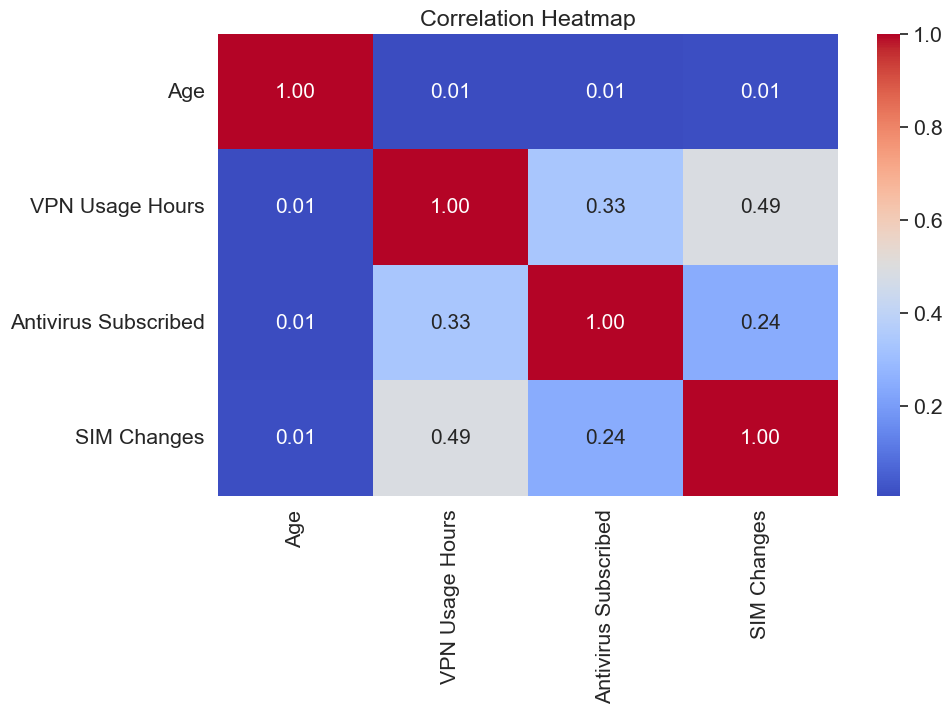

Pairplot of numerical features:


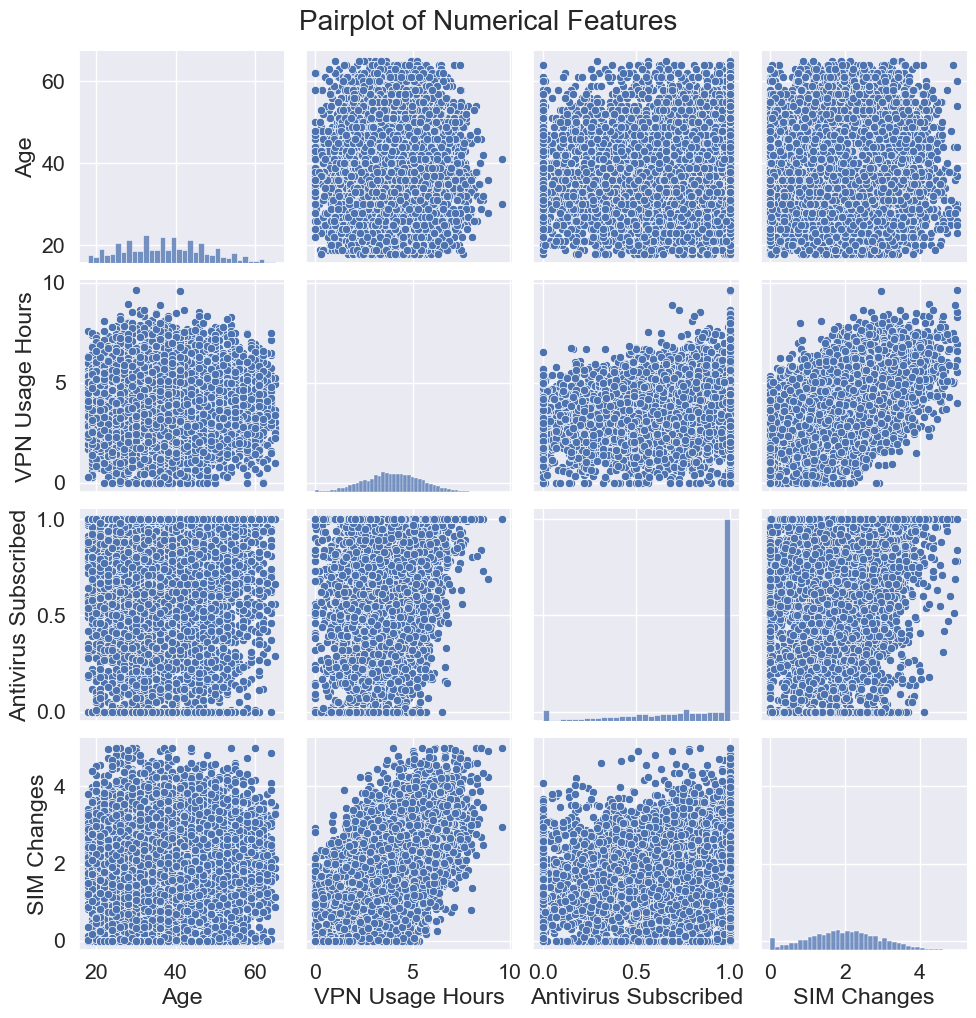

Value Counts for Categorical Features:
Bar plots by `Aadhar No.`:
Too many values to plot Bargraph for Age
Too many values to plot Bargraph for VPN Usage Hours
Too many values to plot Bargraph for Antivirus Subscribed
Too many values to plot Bargraph for SIM Changes


In [9]:
analyze.analyze_dataframe(df)